In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_hdf("../hdf/train_numeric.hdf")

In [3]:
response = pd.read_hdf("../hdf/train_response.hdf")

In [4]:
tmp = pd.concat([train, response], axis=1)

In [19]:
hist = np.histogram(
    tmp[tmp["Response"] == 0.0]["L1_S24_F1844"].values,
    range=(-1.0, 1.0),
    bins=100)

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


In [20]:
df = pd.DataFrame(
    index=hist[1][:-1])
df["hoge0"] = hist[0]

In [41]:
hist = np.histogram(
    tmp[tmp["Response"] == 1.0]["L1_S24_F1844"].values,
    range=(-0.4, -0.2),
    bins=100)

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


In [35]:
df["hoge1"] = hist[0]

In [36]:
df["ratio"] = df["hoge1"] / df.T.sum()

In [42]:
hist[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  1,
        1,  0,  2,  0,  1,  0,  0,  1,  0,  3,  1,  0,  2,  1,  1,  2,  0,
        4,  4,  1,  3,  0,  4,  0,  4,  2,  0,  1,  1,  8,  3, 26, 62, 24,
       26, 17, 12, 28, 22, 32, 14, 20, 17, 10, 11, 11,  2,  7,  7,  0, 11,
        6,  3,  4,  4,  5,  2,  0,  3, 11,  5,  1,  3,  4,  3,  2,  2,  4,
        1,  2,  7,  5,  0,  3,  2,  1,  3,  0,  5,  6,  1,  2,  1])

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


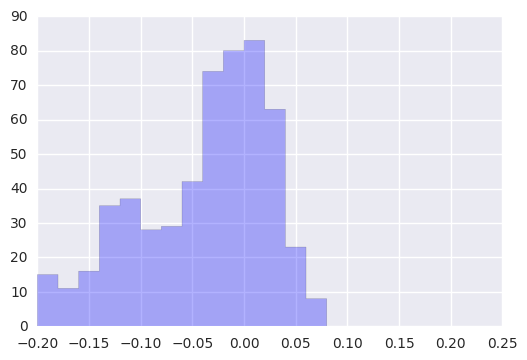

In [7]:
plt.figure()
x = tmp[tmp["Response"] == 1.0]["L1_S24_F1723"].values
plt.hist(
    x,
    bins=20,
    alpha=0.3,
    histtype='stepfilled',
    color='b',
    range=(-0.2, 0.2))
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


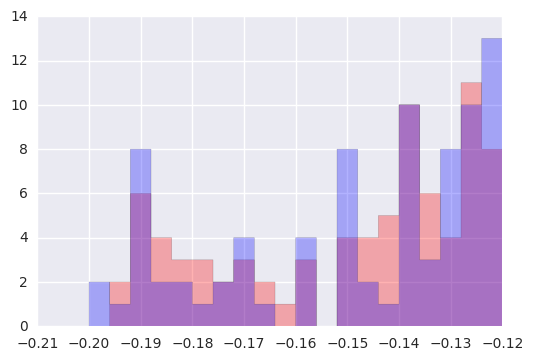

In [12]:
plt.figure()
x = tmp[tmp["Response"] == 1.0]["L1_S24_F1723"].values
plt.hist(
    x,
    bins=20,
    alpha=0.3,
    histtype='stepfilled',
    color='r',
    range=(-0.2, -0.12))
x = tmp[tmp["Response"] == 0.0]["L1_S24_F1723"].values
plt.hist(
    x,
    bins=20,
    alpha=0.3,
    histtype='stepfilled',
    color='b',
    range=(-0.2, -0.12))
plt.show()

In [19]:
train = pd.read_hdf("../hdf/test_numeric.hdf")

In [20]:
train = train[["L1_S24_F1723"]]
train = train.where((-0.12 > train), 1.0)
train = train.where(train == 1.0, np.nan)
train.rename(columns={"L1_S24_F1723": "L1_S24_F1723_-0.12"}, inplace=True)
train.to_hdf("../hdf/test_numeric_L1_S24_F1723_-0.12.hdf", "df", mode="w")